<a href="https://colab.research.google.com/github/kenyarodriguezmor/Estadistica2025B/blob/main/TAREA_2_C%C3%93DIGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                    df        sum_sq       mean_sq          F    PR(>F)
C(tipo_edificio)   2.0  1.478319e+07  7.391595e+06  13.317139  0.000008
Residual          97.0  5.383924e+07  5.550438e+05        NaN       NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2    meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------
Commercial  Industrial   94.8042  0.877  -367.1835  556.7919  False
Commercial Residential -727.5898 0.0006 -1174.3106 -280.8689   True
Industrial Residential  -822.394    0.0 -1236.0386 -408.7494   True
-------------------------------------------------------------------


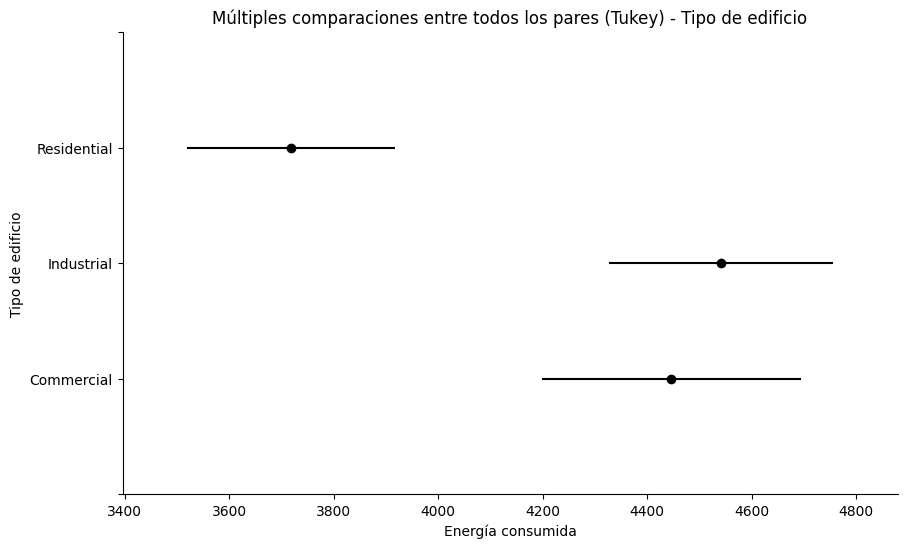

                 df        sum_sq       mean_sq         F    PR(>F)
C(dia_semana)   1.0  1.968893e+06  1.968893e+06  2.894842  0.092034
Residual       98.0  6.665354e+07  6.801382e+05       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2  meandiff p-adj   lower    upper  reject
--------------------------------------------------------
Weekday Weekend -282.6771 0.092 -612.3796 47.0253  False
--------------------------------------------------------


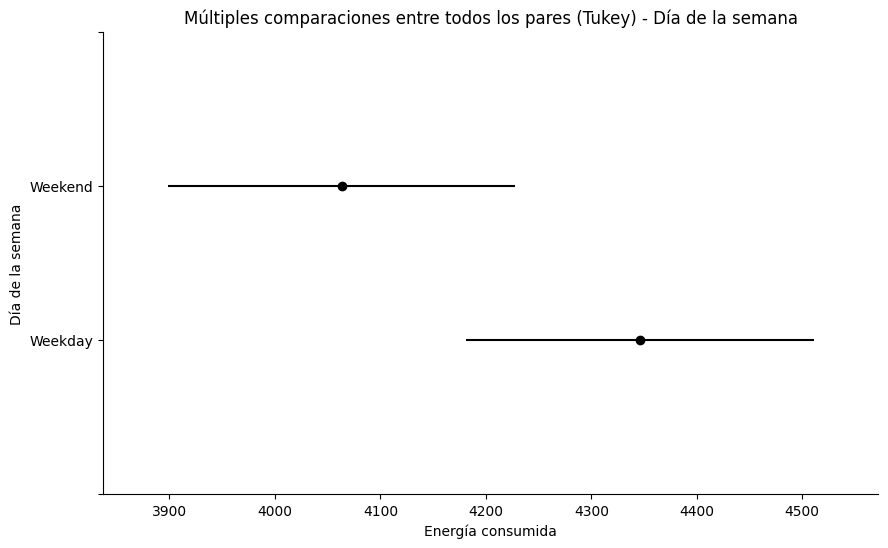

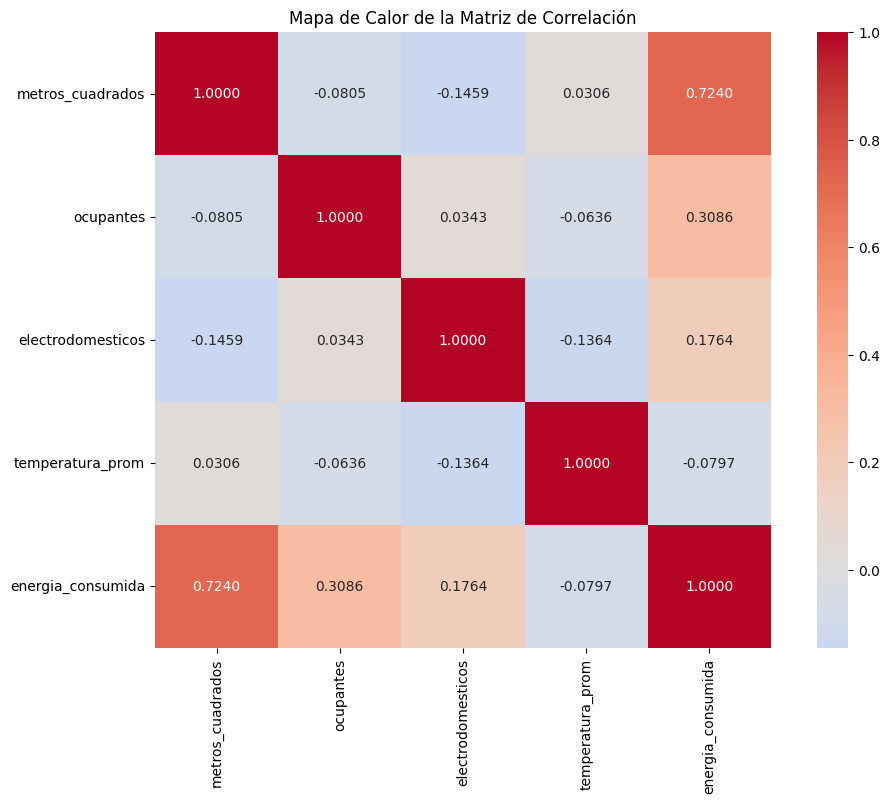

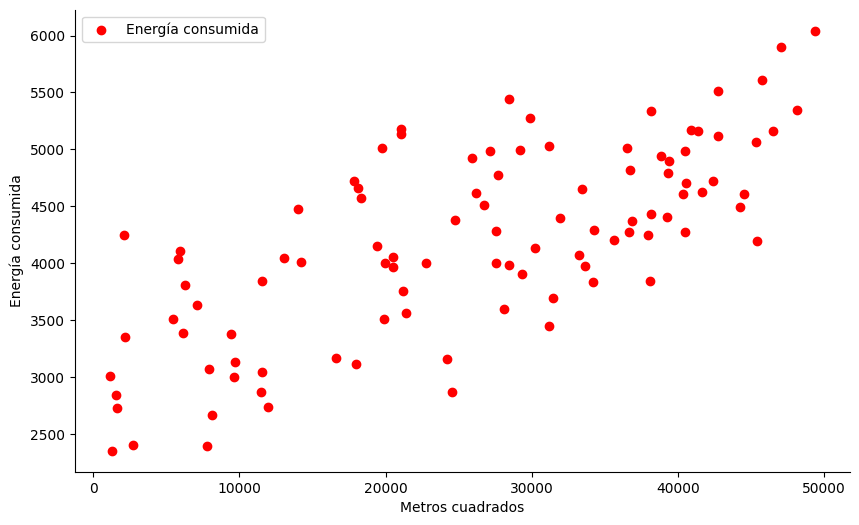

Coeficiente de correlación: 0.7240



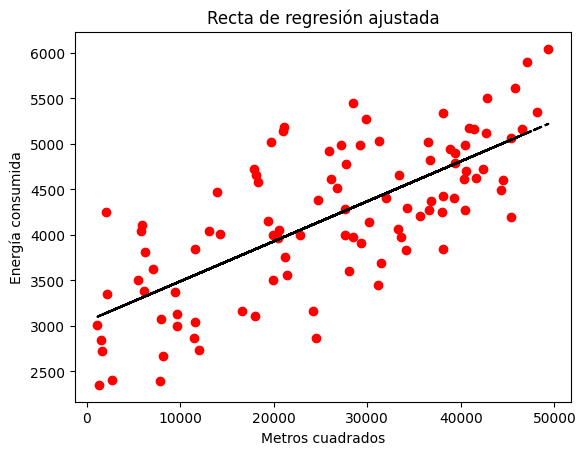

Coeficiente de determinación (R²): 0.5242

Intervalo de confianza para b1 (95%): 0.0356 < b1 < 0.0524



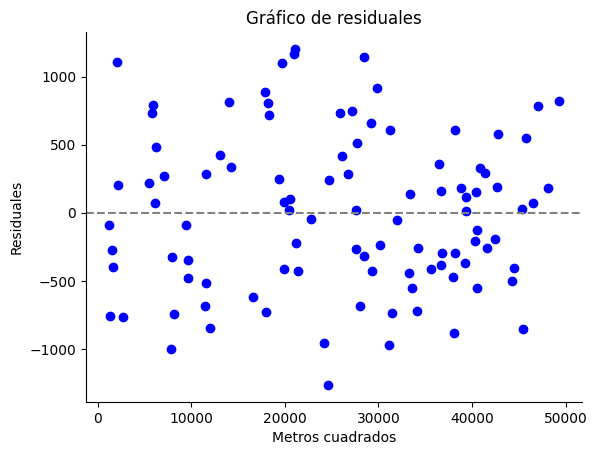

Valor-p de Shapiro-Wilk: 0.1608

Valor-p de Breusch-Pagan: 0.1022

                    df        sum_sq       mean_sq           F        PR(>F)
metros_cuadrados   1.0  3.597413e+07  3.597413e+07  107.983064  1.713693e-17
Residual          98.0  3.264831e+07  3.331460e+05         NaN           NaN


,metros_cuadrados,ocupantes,electrodomesticos,temperatura_prom,energia_consumida
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [12]:
# ======================================================
# MODELO DE REGRESIÓN MÚLTIPLE APLICADO A CONSUMO DE ENERGÍA
# ======================================================

import pandas as pd

# 1. Cargar datos
url = "https://raw.githubusercontent.com/kenyarodriguezmor/Estadistica2025B/main/test_energy_data.csv"
df = pd.read_csv(url)
df = df.dropna()   # eliminar valores nulos
df

# ======================================================
# VERIFICAR COLUMNAS
# ======================================================
df.columns
# ['Building Type', 'Square Footage', 'Number of Occupants',
#  'Appliances Used', 'Average Temperature', 'Day of Week', 'Energy Consumption']

# Renombrar columnas para facilidad de uso
df.columns = ['tipo_edificio', 'metros_cuadrados', 'ocupantes',
              'electrodomesticos', 'temperatura_prom', 'dia_semana', 'energia_consumida']
df

# ======================================================
# ANOVA 1: Tipo de edificio y energía consumida
# ======================================================
from statsmodels.formula.api import ols
import statsmodels.api as sm

# H0: No hay diferencia significativa en la energía consumida según tipo de edificio
# H1: Al menos un tipo de edificio difiere

modelo_lineal = ols('energia_consumida ~ C(tipo_edificio)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)

# ======================================================
# PRUEBA POST-HOC DE TUKEY (Tipo de edificio)
# ======================================================
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

tukey = pairwise_tukeyhsd(
    endog=df['energia_consumida'],
    groups=df['tipo_edificio'],
    alpha=nivel_de_significancia)

print(tukey)

# Gráfico Tukey
tukey.plot_simultaneous(ylabel="Tipo de edificio", xlabel="Energía consumida")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey) - Tipo de edificio")
plt.show()

# ======================================================
# ANOVA 2: Día de la semana y energía consumida
# ======================================================
modelo_lineal = ols('energia_consumida ~ C(dia_semana)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)

# PRUEBA DE TUKEY (Día de la semana)
tukey = pairwise_tukeyhsd(
    endog=df['energia_consumida'],
    groups=df['dia_semana'],
    alpha=nivel_de_significancia)

print(tukey)

tukey.plot_simultaneous(ylabel="Día de la semana", xlabel="Energía consumida")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey) - Día de la semana")
plt.show()

# ======================================================
# CORRELACIONES ENTRE VARIABLES NUMÉRICAS
# ======================================================
import seaborn as sns

# Select only numerical columns for correlation matrix
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", square=True, center=0)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# ======================================================
# REGRESIÓN LINEAL SIMPLE: Duración ↔ Energía (adaptado a metros_cuadrados)
# ======================================================
# Se analizará la relación entre el tamaño del edificio y el consumo de energía

x = df['metros_cuadrados']
y = df['energia_consumida']

# Diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Energía consumida", color='red')
plt.xlabel('Metros cuadrados')
plt.ylabel('Energía consumida')
plt.gca().spines[["top", "right"]].set_visible(False)
plt.legend()
plt.show()

# Coeficiente de correlación
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r:0.4f}\n')

# Recta de regresión
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
yc = modelo.predict(x_constante)

# Gráfico con la recta
plt.scatter(x, y, color='red')
plt.plot(x, yc, color='black', linestyle='--')
plt.xlabel('Metros cuadrados')
plt.ylabel('Energía consumida')
plt.title('Recta de regresión ajustada')
plt.show()

# Coeficiente de determinación
from sklearn.metrics import r2_score
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación (R²): {r2:0.4f}\n')

# Intervalo de confianza del 95% para la pendiente
nivel_confianza = 0.95
intervalo_confianza = modelo.conf_int(alpha=1 - nivel_confianza)
intervalo_confianza_b1 = intervalo_confianza.iloc[1]
print(f'Intervalo de confianza para b1 (95%): {intervalo_confianza_b1[0]:0.4f} < b1 < {intervalo_confianza_b1[1]:0.4f}\n')

# ======================================================
# ANÁLISIS DE RESIDUALES
# ======================================================
residuales = modelo.resid
plt.figure()
plt.scatter(x, residuales, color='blue')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Metros cuadrados')
plt.ylabel('Residuales')
plt.title('Gráfico de residuales')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Prueba de Shapiro-Wilk (normalidad)
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'Valor-p de Shapiro-Wilk: {valor_p_sh:0.4f}\n')

# Prueba de Breusch-Pagan (homocedasticidad)
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp:0.4f}\n')

# ======================================================
# TABLA ANOVA FINAL DEL MODELO DE REGRESIÓN
# ======================================================
modelo_lineal = ols('energia_consumida ~ metros_cuadrados', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
print(tabla_anova)

# ======================================================
# DESCRIPCIÓN ESTADÍSTICA FINAL
# ======================================================
df.describe()